## Utilizando o API  da Alpha Vantage e Yahoo Finance

- Neste projeto mostrarei a retirada de valores para análises fundamentalistas de ações que compoem a minha carteira por meio das ADRs da Nasdaq e açoes da Bovespa.
- Um dos objetivos é fazer comparações gráficas por meio de tendência, para analisar os valores das ações nos dois índices. Usarei o índice de volatilidade gráfico Bollinger Band.
- No caso são compostas pelos códigos: BBD (Bradesco), GOL (GOL -Linhas áereas) na Nasdaq e BBDC4 e GOLL4 na B3.
- Utilizarei o API da Alpha Vantage, um API free de análise de séries temporais de ações para a Nasdaq e a biblioteca yfinance para as ações da B3. 

In [2]:
!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-py3-none-any.whl size=25708 sha256=d8c3d1145e1bbe42590a31a2af05ef5cbc5771f45ef3999cf47553cfdf8d8c91
  Stored in directory: c:\users\andre\appdata\local\pip\cache\wheels\ee\38\2e\306b4a5a2d645520be01077accdd067b9e419006083038ef7e
Successfully built alpha-vantage


In [15]:
%matplotlib inline

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [79]:
#importando as bibliotecas para utilizar os dados do Yahoo Finance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [80]:
# Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

import yfinance as yf

yf.pdr_override()

**Trabalhando com Series Temporais**

- Primeiramente devemos indicar nossa API Key disponivel em : https://www.alphavantage.co/support/#api-key


In [49]:
#Indicar a api_key para os dados da Alpha para os dados da Nasdaq

api_key = 'C4L8XLHC95EKFW6R'

#indicar as ações:

stock = 'BBD'
stock2 = 'GOL'

In [81]:
#Pegando os dados da B3

bbdc = web.get_data_yahoo('BBDC4.SA')

[*********************100%***********************]  1 of 1 completed


In [51]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'BBD',
 '3. Last Refreshed': '2020-07-27',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [118]:
# Aqui pegamos a serie temporal diária da ação ADR do Banco Bradesco

ts = TimeSeries(key='C4L8XLHC95EKFW6R', output_format='pandas')
data_bbd, meta_data = ts.get_daily(symbol= stock, outputsize='full')


In [177]:
data_bbd

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-27,4.39,4.555,4.340,4.53,24031083.0
2020-07-24,4.22,4.370,4.165,4.30,12744748.0
2020-07-23,4.36,4.400,4.260,4.30,16127246.0
2020-07-22,4.43,4.480,4.360,4.45,22519060.0
2020-07-21,4.35,4.490,4.340,4.38,26556144.0
...,...,...,...,...,...
2001-11-29,24.35,24.350,22.880,23.00,45400.0
2001-11-28,25.30,25.300,24.100,24.25,35700.0
2001-11-27,25.75,25.900,25.300,25.80,104000.0


In [82]:
bbdc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,23.535601,23.635300,21.989300,22.030800,12.502825,0.0
2008-01-03,22.114000,22.317699,21.490499,21.577700,12.255054,0.0
2008-01-04,21.781401,21.968500,21.137100,21.324200,12.111085,5694095.0
2008-01-07,21.428101,21.993401,21.415600,21.719101,12.335369,0.0
2008-01-08,22.114000,22.525499,21.931101,22.051600,12.524208,0.0
...,...,...,...,...,...,...
2020-07-22,23.299999,23.350000,22.549999,22.830000,22.830000,41721500.0
2020-07-23,22.889999,22.889999,22.430000,22.500000,22.500000,31033600.0
2020-07-24,22.299999,22.860001,22.080000,22.639999,22.639999,28914300.0


- Como vemos os dois dados possuem uma imcompatibiliadade em relação ao horizonte temporal, pois no yahoo finance a série começa em 2008 enquanto na Alpha em 2001. No presente estudo iremos manter os dados originais, e faremso a analise conjunta a partir de 2008.

In [61]:
data_bbd.describe()

,1. open,2. high,3. low,4. close,5. volume
count,4700.000000,4700.000000,4700.000000,4700.000000,4.700000e+03
mean,19.025047,19.296373,18.738380,19.033855,7.706271e+06
std,11.626078,11.773255,11.490871,11.645209,6.533591e+06
min,2.790000,2.980000,2.680000,2.870000,7.000000e+02
25%,10.240000,10.420000,10.070000,10.260000,1.343750e+06
50%,16.430000,16.670000,16.175000,16.425000,7.313250e+06
75%,23.700000,24.135000,23.282500,23.750000,1.116392e+07
max,74.350000,75.190000,73.510000,74.100000,5.380610e+07


In [83]:
bbdc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3.053000e+03
mean,19.006957,19.264558,18.728154,19.005393,14.618247,1.615424e+07
std,6.871340,6.935133,6.781554,6.863409,7.886916,3.386485e+07
min,9.687410,9.858160,9.636180,9.681720,6.692888,0.000000e+00
25%,13.798300,13.956100,13.646000,13.805800,8.916849,9.343620e+06
50%,16.395201,16.602900,16.149000,16.409401,11.347312,1.367436e+07
75%,21.556499,21.976801,21.190001,21.577700,17.886774,1.912249e+07
max,39.599998,39.939999,39.020000,39.410000,37.261490,1.309448e+09


In [99]:
#Pegando os dados da  GOL na B3

gol = web.get_data_yahoo('GOLL4.SA')

[*********************100%***********************]  1 of 1 completed


In [119]:
# Aqui pegamos por meio do API a série temporal diária da ação ADR da GOL Linhas áereas.

ts = TimeSeries(key='C4L8XLHC95EKFW6R', output_format='pandas')
data_gol, meta_data_gol = ts.get_daily(symbol= stock2, outputsize='full')


In [120]:
data_gol

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-27,7.12,7.25,7.00,7.17,573165.0
2020-07-24,7.10,7.25,6.97,7.16,1247935.0
2020-07-23,7.74,7.81,7.22,7.25,1201075.0
2020-07-22,7.82,8.03,7.70,7.80,1216466.0
2020-07-21,7.88,8.08,7.75,7.83,1489707.0
...,...,...,...,...,...
2004-06-30,17.00,17.15,17.00,17.00,1043600.0
2004-06-29,17.20,17.22,17.05,17.10,495500.0
2004-06-28,18.09,18.09,17.01,17.30,1175400.0


In [100]:
gol

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-24,28.500000,29.000000,28.000000,28.000000,26.044071,2276300
2004-06-25,28.590000,28.590000,27.000000,28.000000,26.044071,915700
2004-06-28,28.000000,28.000000,26.000000,26.670000,24.806976,603700
2004-06-29,26.799999,26.900000,26.400000,26.500000,24.648851,545200
2004-06-30,26.500000,26.600000,25.730000,26.500000,24.648851,611900
...,...,...,...,...,...,...
2020-07-22,20.610001,20.740000,19.860001,20.000000,20.000000,8317100
2020-07-23,19.959999,20.280001,18.910000,19.100000,19.100000,10670000
2020-07-24,18.900000,18.980000,18.350000,18.840000,18.840000,8642000


- As ações da GOL possuem compatibilidade temporal.

In [55]:
data_gol.describe()

,1. open,2. high,3. low,4. close,5. volume
count,4051.000000,4051.000000,4051.000000,4051.000000,4.051000e+03
mean,13.949893,14.228464,13.645274,13.931034,1.069960e+06
std,9.871315,10.034075,9.692997,9.864079,9.392167e+05
min,0.260000,0.276000,0.243500,0.250000,4.788000e+03
25%,5.565000,5.660000,5.440000,5.540000,4.306275e+05
50%,12.080000,12.310000,11.740000,12.030000,8.566000e+05
75%,19.790000,20.205000,19.375000,19.730000,1.404044e+06
max,49.780000,50.490000,48.300000,49.900000,1.282309e+07


In [101]:
gol.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3.968000e+03
mean,22.901310,23.361157,22.388894,22.849698,22.141581,2.487405e+06
std,17.968055,18.263349,17.620673,17.929274,16.922026,5.169818e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,10.220000,10.485000,10.000000,10.197500,10.160000,7.170750e+05
50%,15.150000,15.425000,14.670000,15.055000,15.000000,1.447400e+06
75%,30.250000,30.777500,29.957500,30.304999,29.143641,2.709700e+06
max,84.500000,84.500000,81.000000,82.800003,78.505836,2.434618e+08


**Análise exploratória - BBD**

In [59]:
# aumentando o tamanho dos plots
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

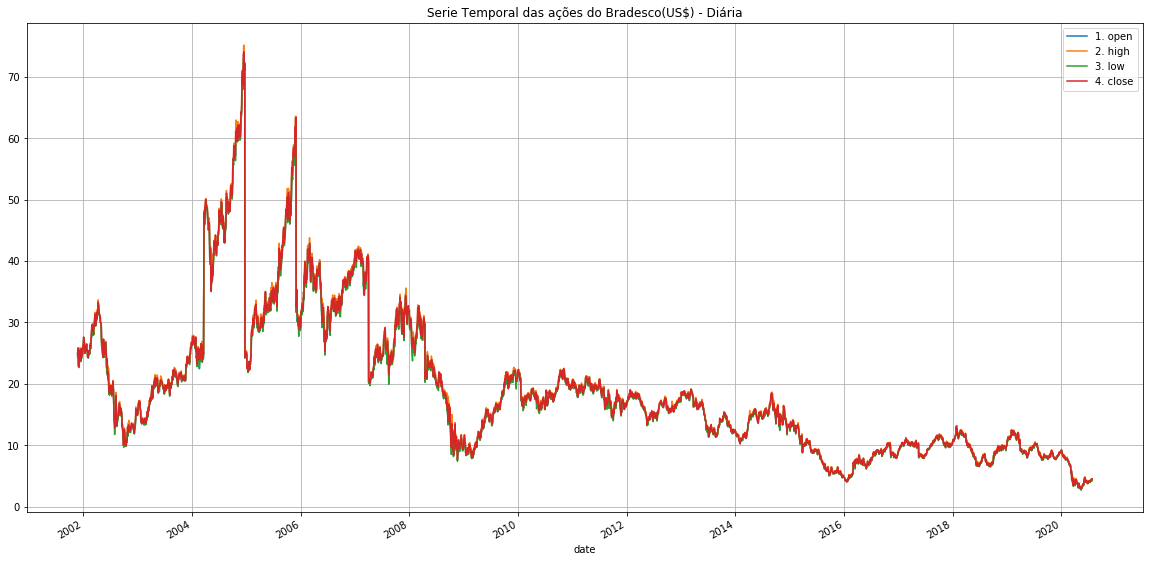

In [66]:
# Plotando os indices

data_bbd = data_bbd.drop('5. volume', 1) #0 or 'index', 1 or 'columns'
data_bbd.plot()
plt.title('Serie Temporal das ações do Bradesco(US$) - Diária')
plt.grid()
plt.show()

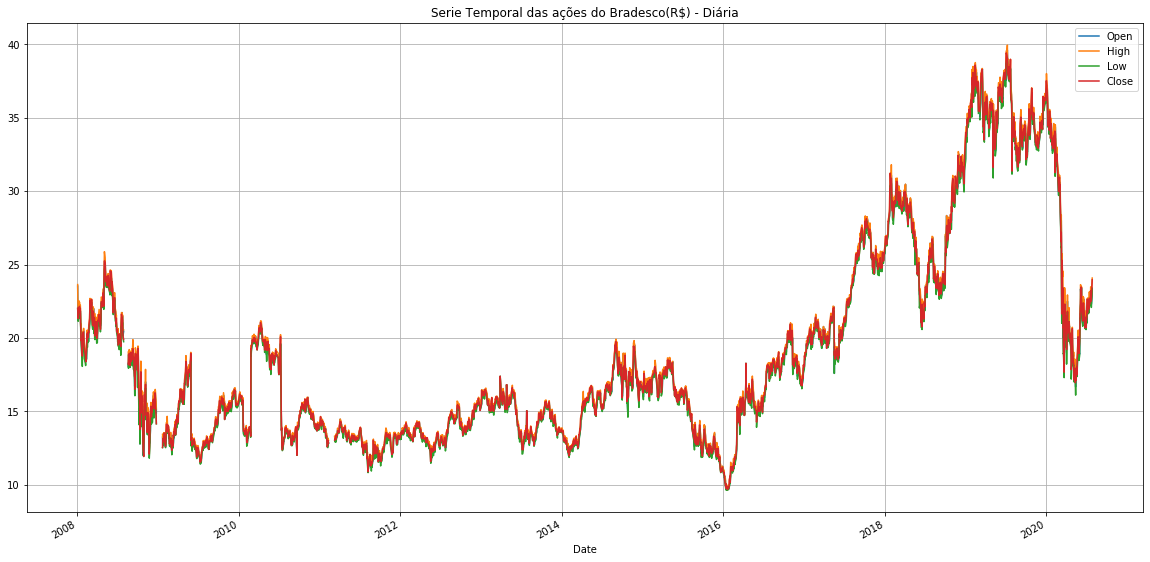

In [98]:
# Plotando os indices

bbdc = bbdc.drop('Adj Close', 1)
bbdc = bbdc.drop('Volume', 1)#0 or 'index', 1 or 'columns'
bbdc.plot()
plt.title('Serie Temporal das ações do Bradesco(R$) - Diária')
plt.grid()
plt.show()

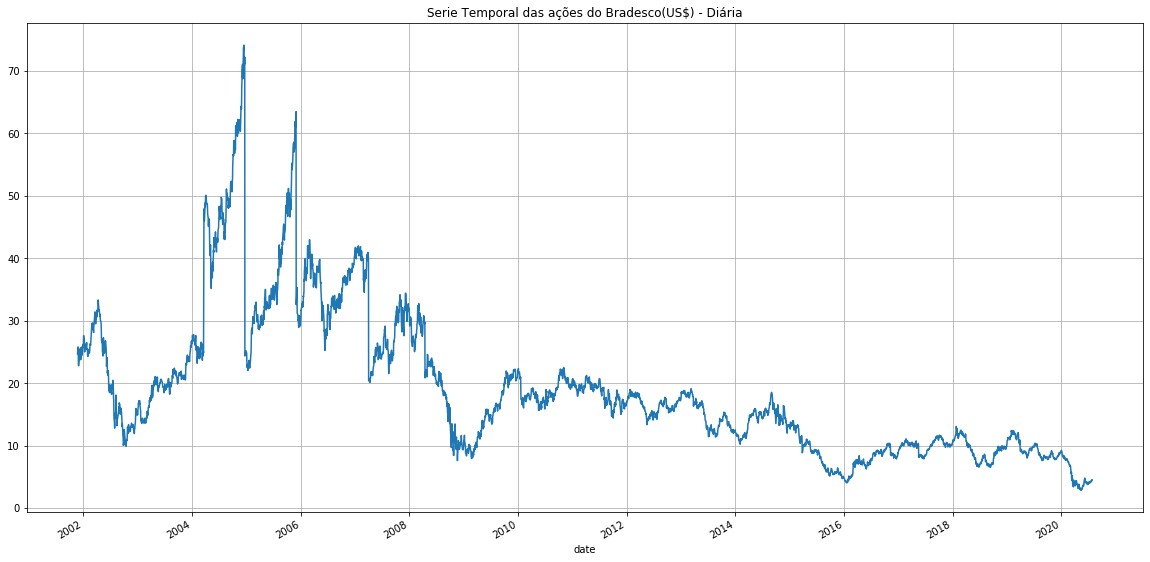

In [65]:
# plotando um gráfico para acompanhar os preços de fechamentos diarios das ações - Nasdaq

#data_bbd.describe()
data_bbd['4. close'].plot()
plt.title('Serie Temporal das ações do Bradesco(US$) - Diária')
plt.grid()
plt.show()

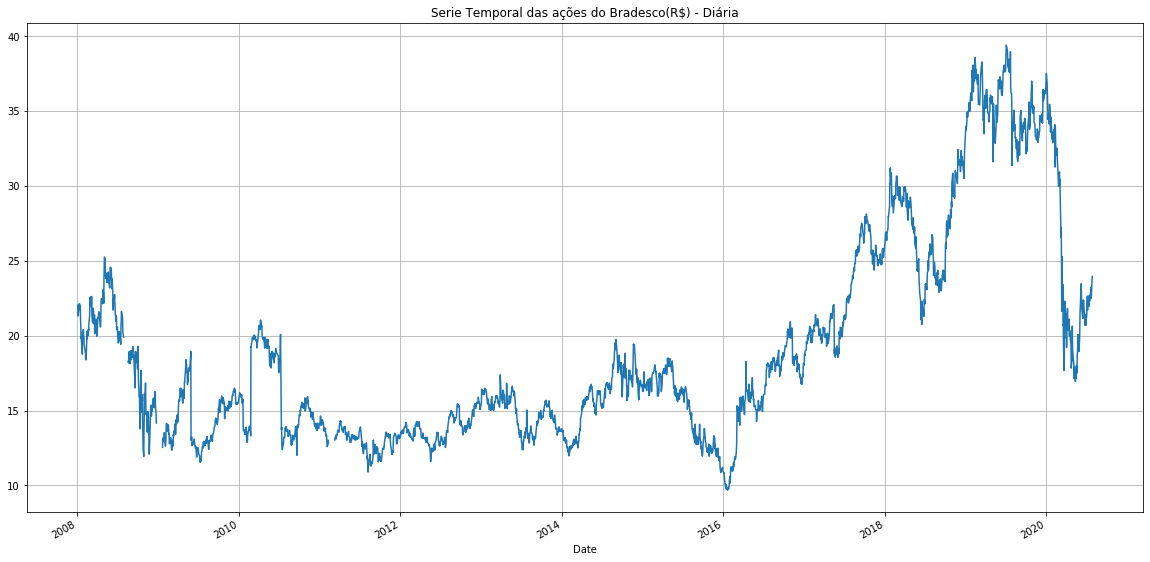

In [95]:
# plotando um gráfico para acompanhar os preços de fechamentos diarios das ações - B3

#data_bbd.describe()
bbdc['Close'].plot()
plt.title('Serie Temporal das ações do Bradesco(R$) - Diária')
plt.grid()
plt.show()

In [171]:
#Aqui buscquei um arquivo excel que possuia no meu hd, para relaizar uma análise mais profunda.

cambio = pd.read_excel("alpha_vantage_stocks\cambio.xlsx")


In [173]:

#cambio_bbdc = cambio.loc[cambio['Date'] > 2008.01] Caso seja necessário diminuir a serie temporal do cambio, para uma melhor análise.

cambio = cambio.set_index("Date") #indexando a data para fazer análise gráfica.

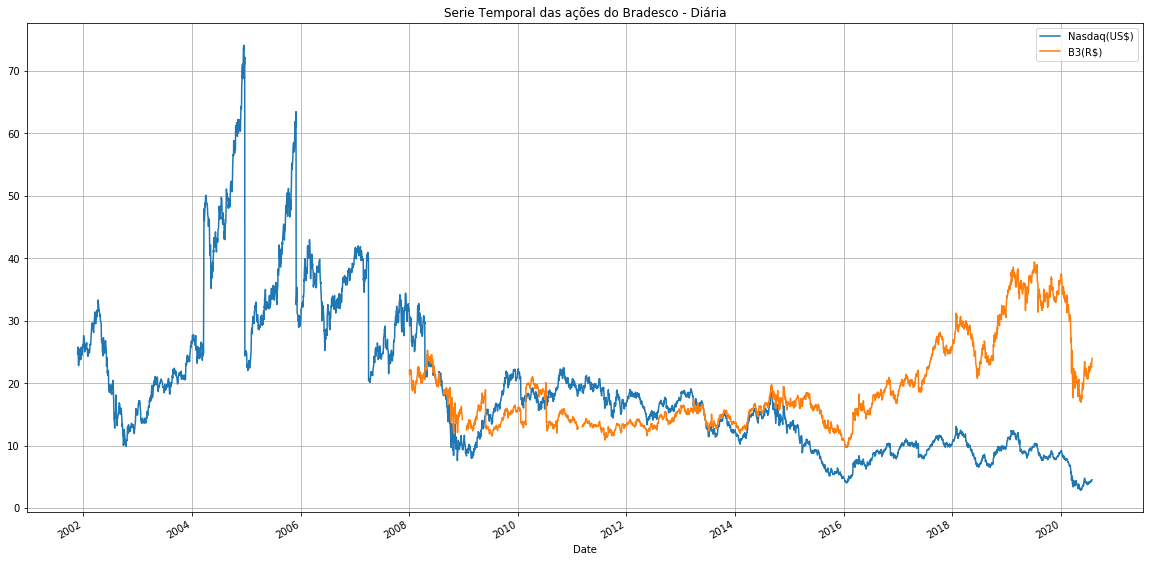

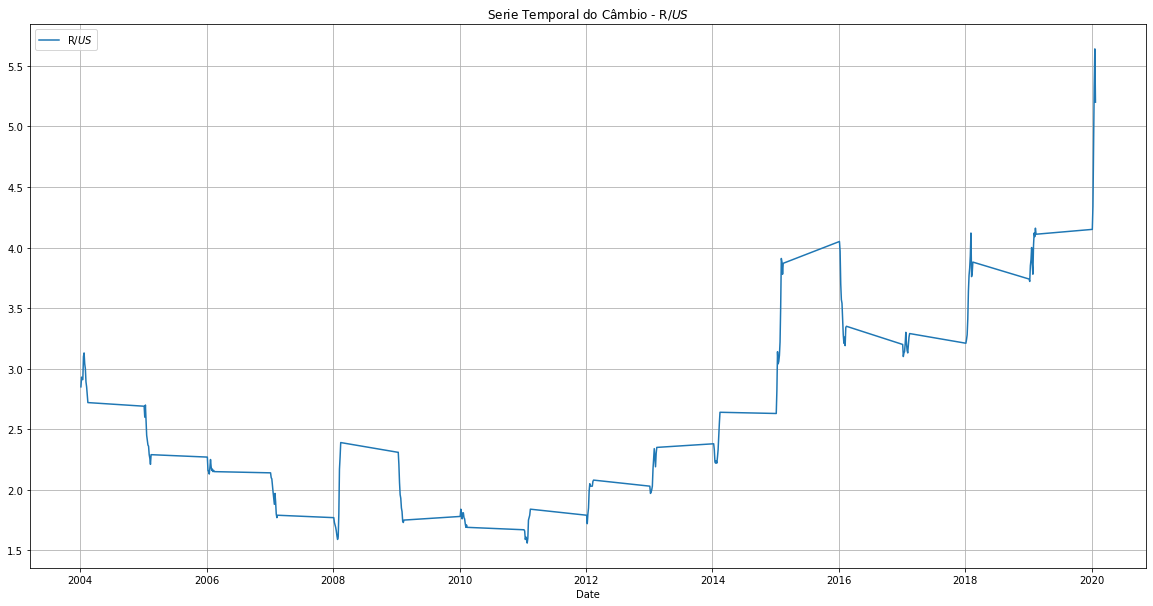

In [175]:
x1 = data_bbd['4. close'].plot(label = 'Nasdaq(US$)')
x2 = bbdc['Close'].plot(label = 'B3(R$)')


plt.title('Série Temporal das ações do Bradesco - Diária')
plt.legend()
plt.grid()
plt.show()

x3 = cambio.plot(label = 'Câmbio')

plt.title('Série Temporal do Câmbio - R$ / US$')
plt.legend()
plt.grid()
plt.show()

- Podemos ver interessantes tendncias entre os dois índices para a mesma ação, a analise deve ser feita a partir de 2008, onde em 2009 a B3 se apresenta mais valorizada que a Nasdaq em relação a ação, vale a pena lembrar que cada uma está em moedas diferentes, portanto a Nasdaq se apresenta muito desvalorizada mesmo considerando o real valorizado na época.  Entre os anos de 2008 a 2010.
- Outro ponto é partir de 2015 onde  ocorre o descolamento entre os dois índices com a ação se valorizando na B3 e se mantendo com pequenas desvalorização na Nasdaq, pode-se ver que mesmo a desvalorização do real na época as duas mantém tendências diferentes, principalmente em 2009, até a queda com a Pandemia em 2020.

**Análise Exploratória - GOL**

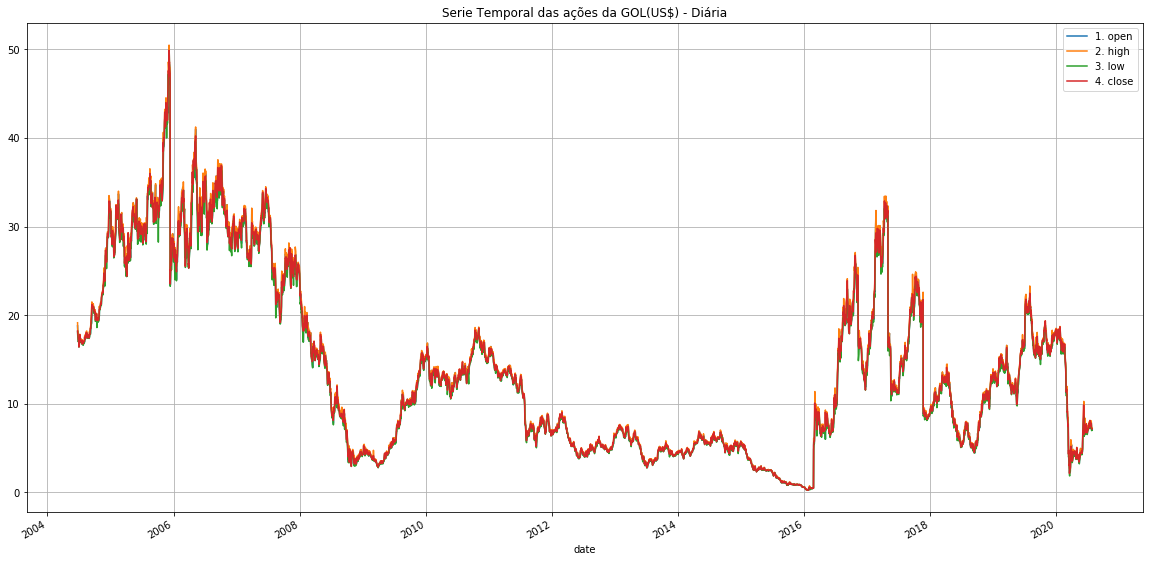

In [70]:
# Plotando os indices

data_gol = data_gol.drop('5. volume', 1) #0 or 'index', 1 or 'columns'
data_gol.plot()
plt.title('Serie Temporal das ações da GOL(US$) - Diária')
plt.grid()
plt.show()

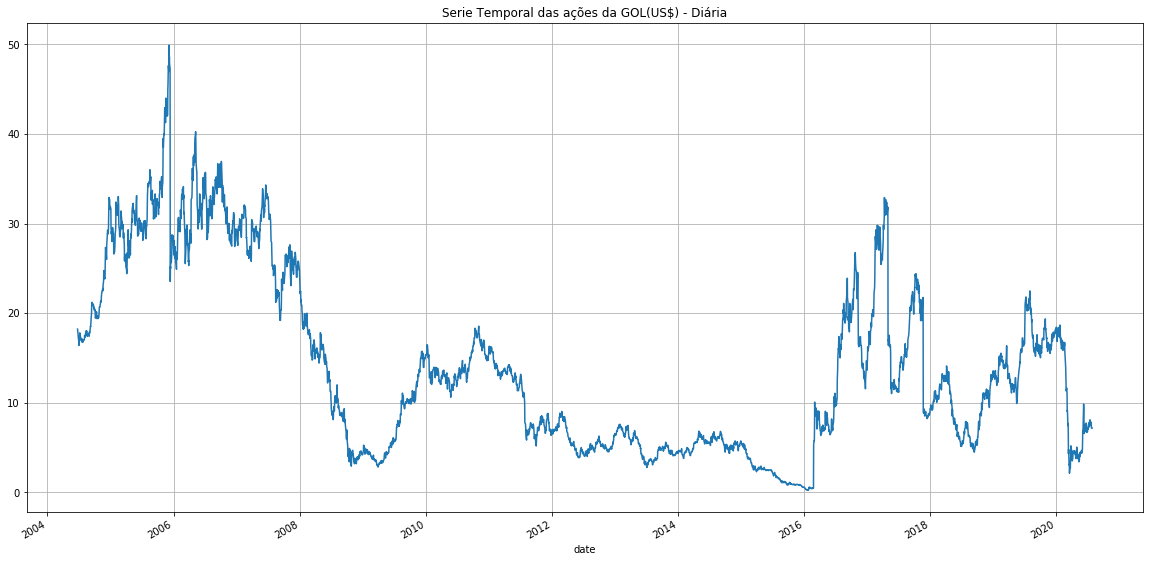

In [121]:
data_gol['4. close'].plot() 
plt.title('Serie Temporal das ações da GOL(US$) - Diária')
plt.grid()
plt.show()

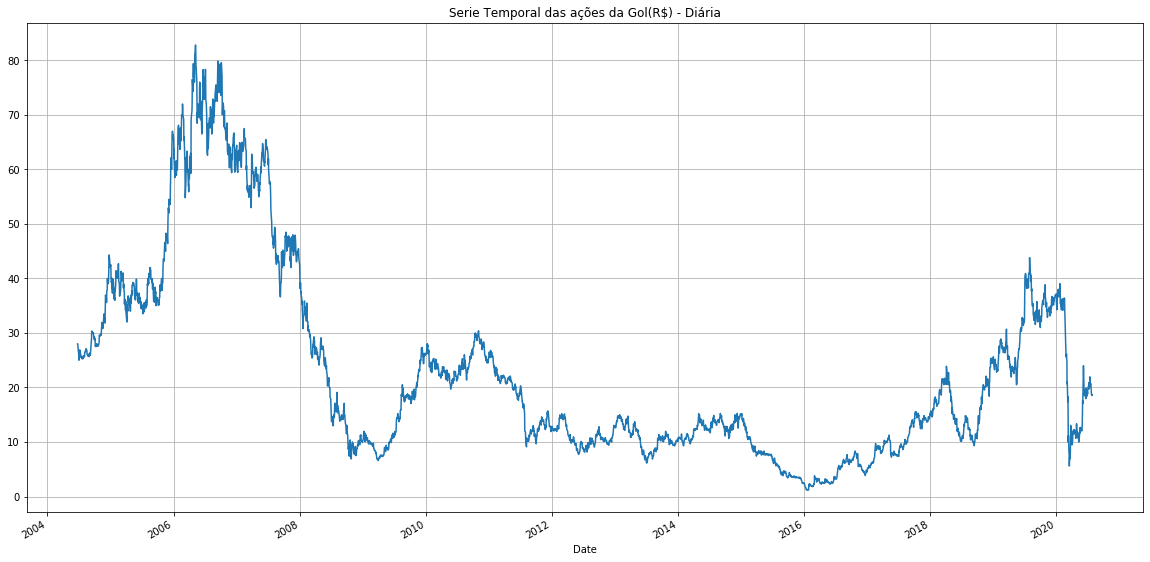

In [122]:
gol['Close'].plot()
plt.title('Serie Temporal das ações da Gol(R$) - Diária')
plt.grid()
plt.show()

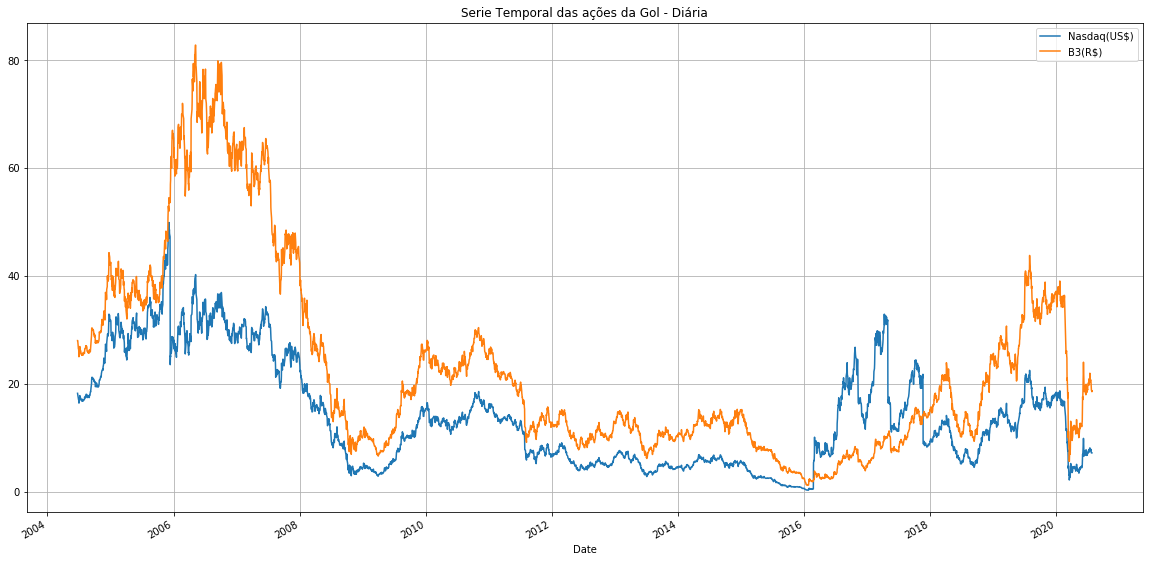

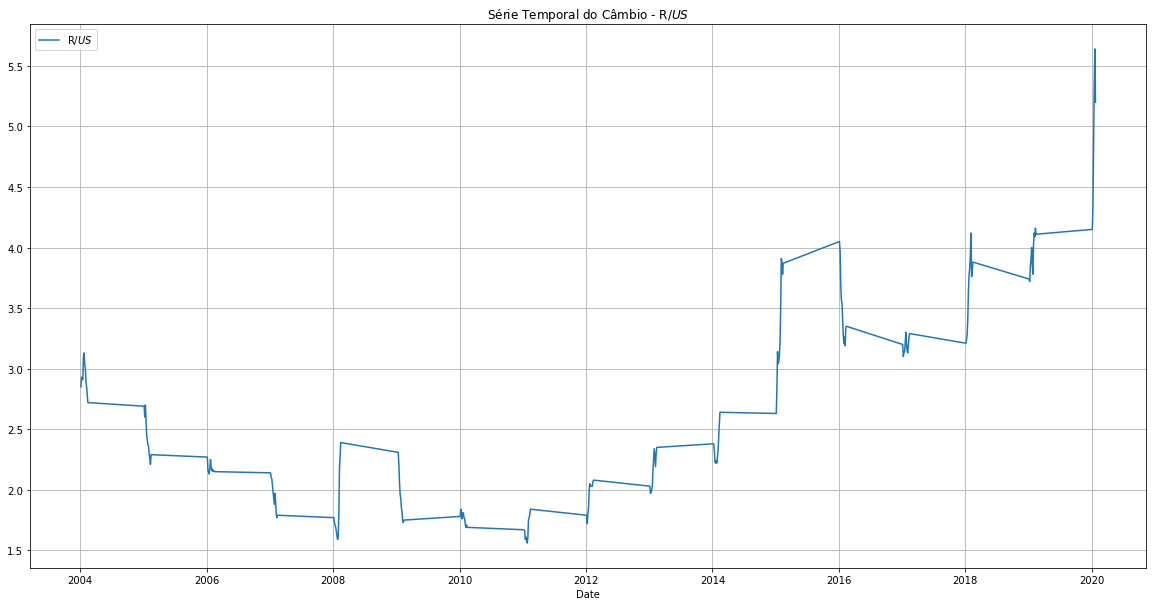

In [176]:
x1 = data_gol['4. close'].plot(label = 'Nasdaq(US$)')
x2 = gol['Close'].plot(label = 'B3(R$)')

plt.title('Serie Temporal das ações da Gol - Diária')
plt.legend()
plt.grid()
plt.show()

x3 = cambio.plot(label = 'Câmbio')

plt.title('Série Temporal do Câmbio - R$ / US$')
plt.legend()
plt.grid()
plt.show()


- Vemos que em relação a tendência entre os dois índices para a GOL, é visto que seguem a mesma, portanto variando na maior parte da série temporal com relações iguais.
- Com excessão de 2006 a 2008 onde mesmo com a valorização do real, com um valor 2,50 reais por doláres, as ações se valorizaram mais na B3 do que na Nasdaq. Outro período que obteve interessante tendência foi entre 2016 a 2018, onde ocorre a inversão de valores entre os dois índices com as ações da Nasdaq ultrapassando os preços praticados no Brasil, isso com moedas diferentes, portanto ocorreu uma alta tendência de desvalorização no Brasil que não ocorreu nos EUA.

Trabalhando com indicadores técnicos

- O indicador utilizado será os Bollinger Bands: A interpretação das Bollinger Bands é baseada no fato de os preços tenderem a permanecer entre a linha inferior e a superior das bandas. Uma característica distinta do indicador Bollinger Bands é a sua largura variável, devido à volatilidade dos preços. Em períodos de mudanças consideráveis nos preços ​​(ou seja, de alta volatilidade) as faixas alargam, deixando um monte de espaço para os preços se moverem dentro. Durante os períodos de inatividade (i.e., períodos de baixa volatilidade) as bandas contraem, mantendo os preços dentro dos seus limites.

In [104]:
from pandas_datareader import data, wb

In [71]:
# BBD

ti = TechIndicators(key='C4L8XLHC95EKFW6R', output_format = 'pandas')
data_ti, meta_data = ti.get_bbands(symbol= stock, interval = 'daily', time_period=60)
data_ti.describe()

,Real Middle Band,Real Upper Band,Real Lower Band
count,4641.000000,4641.000000,4641.000000
mean,19.090643,22.818234,15.363051
std,11.211300,14.893144,9.032550
min,3.709000,4.659600,-2.569000
25%,10.378300,12.031500,8.375700
50%,16.425700,18.827200,13.704800
75%,24.929000,28.323700,18.780400
max,62.310200,90.879500,51.056200


In [72]:
meta_data

{'1: Symbol': 'BBD',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2020-07-27',
 '4: Interval': 'daily',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

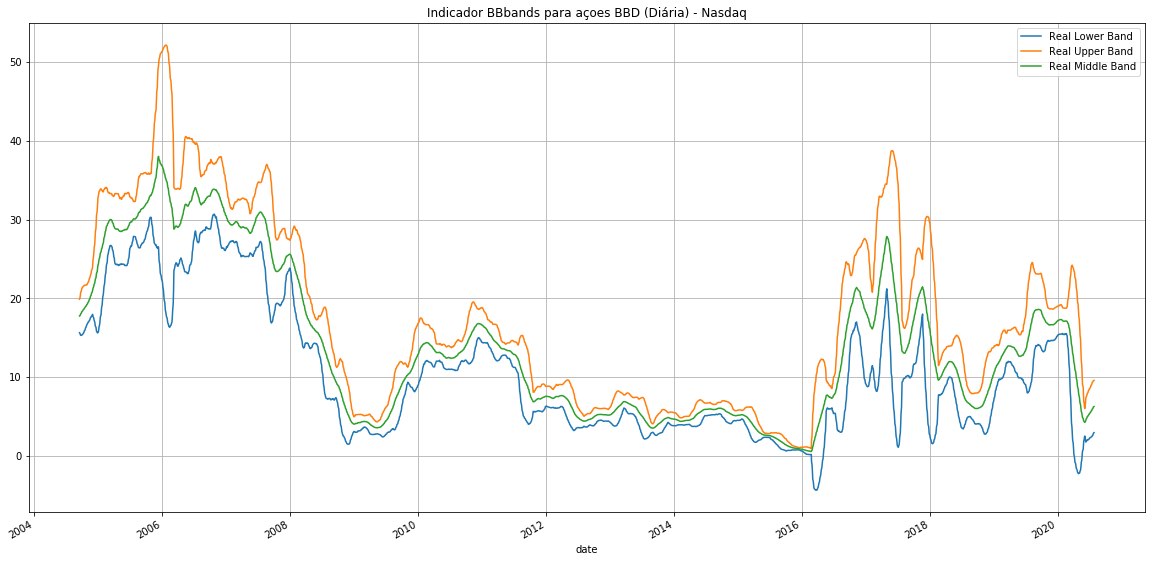

In [180]:
#Plotando os indicadores

data_ti.plot()
plt.title('Indicador BBbands para açoes BBD (Diária) - Nasdaq')
plt.grid()
plt.show()

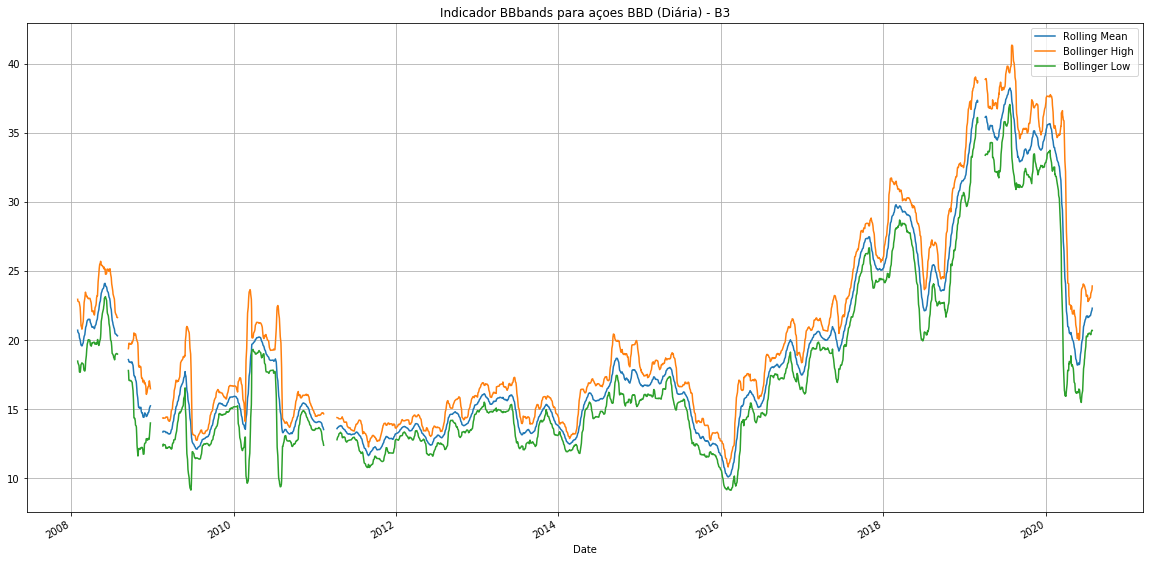

In [181]:
#Defina o número de dias e os desvios padrão a serem usados no período de lookback contínuo para o cálculo da banda de Bollinger
window = 21
no_of_std = 2
#Calcular a média móvel e o desvio padrão usando o número de dias definido acima
rolling_mean = bbdc['Close'].rolling(window).mean()
rolling_std = bbdc['Close'].rolling(window).std()
#crie três novas colunas DataFrame para armazenar valores das bandas superior e inferior de Bollinger
bbdc['Rolling Mean'] = rolling_mean
bbdc['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
bbdc['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

bbdc[['Rolling Mean','Bollinger High','Bollinger Low']].plot()

plt.title('Indicador BBbands para açoes BBD (Diária) - B3')
plt.grid()

- Pode se ver que a ação por meio do comercio ADR, apresentou uma baixa volatilidade, uma variação maior ocorre apenas entre os anos de 2004 a 2006, por questões comporativas da empresa.
- Vemos também que a partir de 2008 a B3 apresentou uma pequena tendencia de alta enquanto a Nasdaq esteve em queda no período.

In [74]:
# GOL

ti = TechIndicators(key='C4L8XLHC95EKFW6R', output_format = 'pandas')
data_ti, meta_data = ti.get_bbands(symbol= stock2, interval = 'daily', time_period=60)
data_ti.describe()

,Real Lower Band,Real Upper Band,Real Middle Band
count,3992.000000,3992.000000,3992.000000
mean,10.477915,17.435818,13.956867
std,8.377025,11.613111,9.635526
min,-4.367700,0.925000,0.543700
25%,3.843175,7.346025,5.666875
50%,8.315250,14.646250,12.432750
75%,14.961375,26.216800,19.428050
max,30.686000,52.142200,38.008000


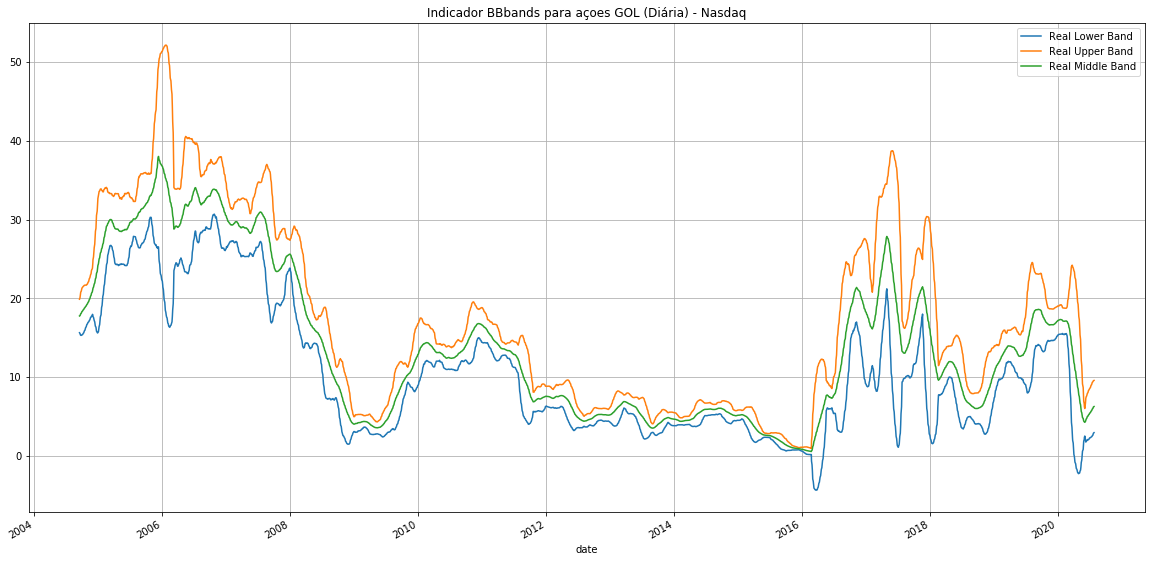

In [182]:
#Plotando os indicadores

data_ti.plot()
plt.title('Indicador BBbands para açoes GOL (Diária) - Nasdaq')
plt.grid()
plt.show()

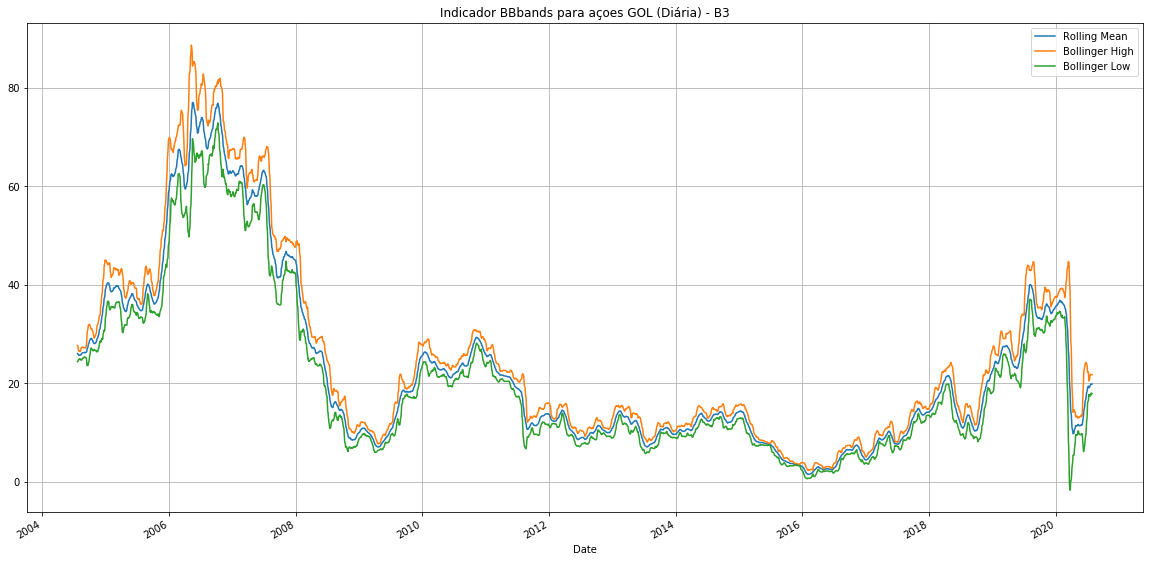

In [183]:

window = 21
no_of_std = 2

rolling_mean = gol['Close'].rolling(window).mean()
rolling_std = gol['Close'].rolling(window).std()

gol['Rolling Mean'] = rolling_mean
gol['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
gol['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

gol[['Rolling Mean','Bollinger High','Bollinger Low']].plot()

plt.title('Indicador BBbands para açoes GOL (Diária) - B3')
plt.grid()

- Ao contrario do BBD, a GOL, apresenta maior volatilidade isto na bolsa americana, onde apresenta uma alta volatilidade principalemtne no período de 2006 a 2007, devido a um grande acidente aéreo, e outra ilha de volatilidade de 2016 a 2018 devido a investigação na comissão de valores mobiliários americana, e outra em 2020 devido as consequencias to fechamento devido a COVID-19. Já na bolsa brasileira a série apresentou uma menor volatilidade.

In [110]:
gol = gol.drop('Adj Close', 1)
gol = gol.drop('Volume', 1)

In [113]:
gol

,Open,High,Low,Close,Rolling Mean,Bollinger High,Bollinger Low
Date,,,,,,,
2004-06-24,28.500000,29.000000,28.000000,28.000000,NaN,NaN,NaN
2004-06-25,28.590000,28.590000,27.000000,28.000000,NaN,NaN,NaN
2004-06-28,28.000000,28.000000,26.000000,26.670000,NaN,NaN,NaN
2004-06-29,26.799999,26.900000,26.400000,26.500000,NaN,NaN,NaN
2004-06-30,26.500000,26.600000,25.730000,26.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-07-22,20.610001,20.740000,19.860001,20.000000,19.859048,21.846960,17.871135
2020-07-23,19.959999,20.280001,18.910000,19.100000,19.900000,21.780351,18.019649
2020-07-24,18.900000,18.980000,18.350000,18.840000,19.885238,21.794957,17.975519


In [58]:
# Juntando os valores high e open das duas ações em um arquivo json.

import requests
import alpha_vantage
import json


API_URL = "https://www.alphavantage.co/query" 
symbols = ['BBD','GOL']

for symbol in symbols:
        data = { "function": "TIME_SERIES_DAILY", 
        "symbol": symbol,
        "outputsize": "full",       
        "datatype": "json", 
        "apikey": "C4L8XLHC95EKFW6R" } 
        response = requests.get(API_URL, data) 
        data = response.json()
        print(symbol)
        a = (data['Time Series (Daily)'])
        keys = (a.keys())
        for key in keys:
                print(a[key]['2. high'] + " " + a[key]['4. close'] + " " + a[key]['5. volume'])

BBD
4.5550 4.5300 24031083
4.3700 4.3000 12744748
4.4000 4.3000 16127246
4.4800 4.4500 22519060
4.4900 4.3800 26556144
4.2300 4.2100 12593455
4.2100 4.1300 11998300
4.1900 4.1400 11256500
4.3100 4.1600 19708900
4.1500 4.1500 21377400
4.1800 4.0500 16196700
4.1400 4.1400 32626700
4.2600 4.0700 27235300
4.2000 4.1700 18918100
4.2300 4.0100 20659800
4.2400 4.1700 21286000
4.1200 3.9200 17560500
3.9800 3.9400 17432600
3.8600 3.8100 17869000
3.9200 3.9000 20443100
3.8700 3.7700 15256700
4.0200 3.9800 23281200
4.1100 3.8800 21759400
4.2600 4.1800 25806700
4.2600 4.0700 18489600
4.2300 4.1000 47021000
4.2500 4.1400 26865600
4.3500 4.2300 20682000
4.3500 4.2300 27241600
4.2100 4.1200 20359800
4.3500 4.2700 35255900
4.2500 4.0500 26789100
4.7600 4.4200 30591400
4.7800 4.6600 24320700
4.8200 4.8000 20429300
4.6800 4.5000 24705200
4.3300 4.2600 25678500
4.3500 4.2300 26335200
3.9700 3.9700 18023200
3.7000 3.6400 17004600
3.5500 3.4600 22843400
3.6700 3.5600 17258200
3.7200 3.6900 14903400
3.7500 

15.6000 15.5700 6612500
15.5700 15.4300 6770500
15.4800 15.2800 8171800
15.7600 15.5000 5334200
16.0900 15.6600 4541000
15.8700 15.7300 4622700
16.0300 15.8500 6655100
16.0600 15.9900 6553800
15.8300 15.8200 6011500
15.9500 15.9200 5807900
15.9200 15.8400 6048300
15.7300 15.5800 1938300
15.1900 14.7700 1623800
15.5100 15.0400 8303200
15.6100 15.5300 6680800
15.5200 15.5000 7218800
14.9200 14.8800 5677000
14.8500 14.7700 9492100
15.0400 14.6000 10893800
14.6300 14.4100 4100100
14.5900 14.5000 4055200
14.6500 14.6300 5477600
14.5800 14.2800 6050900
14.8000 14.5500 6575700
14.8000 14.5200 6001100
14.9900 14.7400 4698100
14.9900 14.9100 4567700
15.5400 14.9300 6066100
15.6000 15.3700 10203400
15.4000 15.3500 3990300
15.4200 15.3800 5173300
15.5300 15.2600 4283300
15.3700 15.3600 7240100
15.1100 14.9400 4180400
15.3200 15.2800 4575600
15.4000 15.3300 4773300
15.4200 15.2700 4786500
15.4400 15.3900 8319800
15.1000 14.9900 7164400
14.9900 14.8900 9800700
14.4200 14.3600 12842600
13.8700 13.69

18.1500 17.9300 7266900
17.9300 17.8500 7134800
18.0100 17.7400 8795700
18.4400 18.3300 8347400
18.7200 18.5800 6885900
18.4900 18.4300 3379300
18.5800 18.4500 2814500
18.5700 18.3200 11004500
18.6900 18.4300 9425400
18.9900 18.9200 9794500
18.7600 18.6300 10863000
18.8000 18.5200 11304000
18.6500 18.5500 19258400
18.0500 17.6800 7676200
17.8900 17.8100 6071700
17.8400 17.8400 7895500
17.7800 17.7200 13066600
17.3500 17.0300 10230000
17.2800 17.2200 11517900
16.9000 16.8800 7889200
16.9300 16.4300 9570000
17.1300 16.8800 9315500
17.1400 17.0400 12148800
18.8800 18.7200 6583300
18.8900 18.5000 8040500
19.0000 18.9800 6235300
18.7400 18.7000 18040000
18.1500 18.1300 15116800
17.3000 17.0200 8021200
17.1000 17.0000 8268500
16.6000 16.5800 12710000
16.3800 15.8600 12314600
16.5500 16.0400 15569400
17.3400 17.0400 6763900
17.1900 17.1700 4936500
17.3100 16.9300 8203200
17.4500 17.3500 9695400
17.9500 17.4000 9500700
17.9300 17.7500 6953300
17.5600 17.4500 6373100
17.6600 17.3000 5933700
17.

32.9300 31.9000 1158500
33.3600 32.8400 784200
33.2300 33.0800 882200
33.9500 33.3900 985100
34.4700 34.0400 1276400
34.2700 33.6900 1402500
33.5200 33.3700 947500
32.8400 31.8200 517600
32.8100 32.4100 789100
32.7600 32.7500 1137500
33.6200 32.2900 1253500
33.7100 32.5900 1732700
33.9000 33.0500 1454200
34.4800 33.9400 1302500
33.4200 33.1800 1228800
33.5900 33.3000 1019500
33.0900 32.8400 1013500
33.8300 33.5300 1322900
33.7000 33.5900 1568300
32.9900 32.1800 1550000
32.6600 32.3600 1298300
32.3000 32.2700 974100
31.9500 31.8800 1061600
30.7200 30.2800 968500
31.5600 30.3000 1291500
31.1000 31.1000 1426000
29.3500 28.6400 1538800
29.1900 28.5600 888200
29.4900 28.9500 3975400
30.1900 29.1400 1549500
31.5600 30.6000 801000
31.4100 31.4100 612600
31.9000 31.2300 581200
32.1800 31.0300 936700
32.3800 32.0100 1068300
31.9400 31.4000 1558100
32.6200 32.5800 992900
31.8200 31.0900 1937200
31.1000 30.9500 3923400
27.9200 27.8000 1418900
28.5000 27.6300 1097100
28.7000 28.3300 769500
28.4800

15.5000 15.2000 132300
16.4000 16.1000 215400
17.1200 16.6000 333600
17.0400 16.8500 155200
16.3000 16.1700 104300
16.0000 15.8600 84000
16.5000 16.1600 359600
15.6200 15.6200 497500
15.0500 14.8700 124400
14.8500 14.8500 522100
14.8800 14.7000 984400
14.6300 14.5000 322800
14.7500 14.3000 305900
14.2000 14.0500 163000
14.1000 13.2100 327900
14.2000 13.7300 254900
14.4000 13.8700 399100
15.9900 14.5300 363700
17.4500 16.0500 154000
18.6000 18.1000 600100
16.1100 16.1000 209200
15.1400 15.0300 462000
15.1000 14.3800 344900
15.3300 15.1700 544700
13.9000 13.9000 279300
13.1200 12.8000 254200
13.7000 12.8400 1757400
14.8000 13.6800 341500
15.6500 14.4000 283800
17.1000 15.6400 245700
17.5000 17.4500 199400
18.8000 17.6000 122900
19.6500 19.0000 144000
20.2000 19.9000 167100
20.5500 20.4500 122700
19.8500 19.8500 114500
19.4800 19.1300 225500
19.6700 19.4000 282500
19.7500 19.7500 130400
18.8800 18.8800 883700
18.8100 18.2100 62600
18.8000 18.6000 162600
18.7500 18.5500 26800
18.8500 18.75

2.4600 2.4500 541985
2.5050 2.4400 1786947
2.5400 2.5200 1497039
2.5700 2.5200 1391933
2.6000 2.5400 2231167
2.6100 2.5600 1350605
2.7700 2.6300 938707
2.8300 2.7900 1758904
2.7300 2.6800 1078669
2.6400 2.6200 1336529
2.5800 2.5600 699508
2.6099 2.5400 774428
2.6700 2.6100 2470905
2.6400 2.6300 872707
2.7200 2.6200 881263
2.7200 2.6800 943093
2.6100 2.6000 763783
2.5900 2.5800 690760
2.6300 2.5400 1368473
2.7900 2.6400 1548933
3.0000 2.7600 1674245
2.9800 2.9400 1677121
2.8499 2.8200 1010236
2.7700 2.7500 881580
2.7400 2.6700 904164
2.7400 2.6300 659562
2.7000 2.6600 345379
2.7900 2.6800 1138849
2.8700 2.8100 800227
2.8400 2.8200 989322
2.8200 2.7900 2892587
2.6050 2.5300 492256
2.6800 2.5900 1026853
2.7300 2.6200 740185
2.7100 2.6800 3000998
2.5600 2.5400 2325982
2.5100 2.4900 1612927
2.4100 2.4000 1810590
2.5200 2.3100 2762586
2.5700 2.4300 2018528
2.5610 2.5300 1427947
2.5800 2.5300 1138425
2.6900 2.5900 1198440
2.8900 2.7100 1196169
3.0000 2.8500 1592756
3.0000 2.9400 2452714
2.810

13.4700 13.3400 1304868
13.1900 13.0800 1253778
12.9900 12.6400 1379999
13.0300 13.0100 1969920
12.5300 12.4400 816861
12.5100 12.3600 732388
12.6000 12.3400 1054601
12.4000 12.3600 741805
12.3600 12.2800 807092
12.6400 12.4500 1720844
13.0800 12.7000 1624896
13.0900 13.0100 826823
13.1300 13.0100 953868
13.3400 13.0300 1134764
13.3850 13.1000 1385286
13.5000 13.3800 1310918
13.4600 13.3000 1435160
13.8800 13.7700 789419
13.9800 13.5900 688109
14.3200 13.9600 1813649
13.9000 13.7100 2748452
13.9300 13.5300 981523
13.7800 13.7600 1544556
14.3500 14.0200 1247431
14.2600 14.2500 2244249
13.9800 13.9300 2444527
14.2800 14.0300 1194476
14.3200 14.2300 1167476
14.1100 14.0600 727168
14.1800 14.0200 840054
13.9100 13.8900 910274
13.3150 13.2900 749214
13.3800 13.1500 802590
13.5200 13.4600 581403
13.4500 13.3900 616766
13.3900 13.3100 748072
13.5700 13.2500 1192977
13.4700 13.2900 749965
13.7100 13.5000 814847
13.9300 13.6100 1180679
13.9800 13.6900 658748
13.9000 13.7500 828155
13.8900 13.86

33.7800 33.3200 1142200
32.6900 32.4800 623500
32.1400 31.9400 765200
32.0000 32.0000 910910
32.4800 31.2200 1291250
31.8200 31.6700 410300
31.7400 31.3300 715500
31.5500 30.6600 1212200
32.2000 31.4800 1559900
33.1200 32.7800 693110
33.6600 33.0900 966415
34.0699 33.8800 955344
33.5000 32.8000 1255000
32.6100 32.5500 1099400
32.5300 31.9300 1477904
31.4900 31.4200 880758
30.7200 30.2700 969250
31.1990 30.6800 1282600
31.2100 31.0000 1822800
30.7800 30.6600 1945700
29.9500 29.9000 2254000
29.4700 29.2000 671900
29.3900 29.3500 1169250
28.5000 28.3500 935000
28.3700 28.0500 1338300
28.0400 27.8600 1235800
27.6700 27.2000 2133100
28.3700 27.7100 2708700
28.2700 27.8100 2092900
29.1400 28.4000 712100
29.4000 29.0800 501700
29.3600 29.0900 670675
29.0000 28.9100 926300
28.6900 28.5100 580000
29.1799 28.5200 720400
29.2900 29.1900 680800
29.8800 29.2900 809021
29.8900 29.7100 1579500
29.7101 29.5400 648600
29.9100 29.3400 1027700
29.9400 29.5200 1677000
29.2100 29.1000 1112100
29.3500 29.35